<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPrepBlipGlitches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install --target=$nb_path gwpy --upgrade

  Using cached https://files.pythonhosted.org/packages/2d/e6/14f8cefc3ebd73e062323ed94ecc2ea943b3ab69137b2b9fc9df4087a9bc/gwpy-0.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d6/9e/616124723b7a8f2a5399f9288b056bb31f37222b0b7cae46f6bafaa42154/gwdatafind-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/46/ae6773894f7eacf53308086287897ec568eac9768918d913d5b9d366c5db/numpy-1.17.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6d/ff/67426ce11f9f3432e020f5d5ef796e1d8e1c2a76b555c8705177f4347f99/gwosc-0.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df/ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packag

In [0]:
import gwpy
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
from gwpy.timeseries import TimeSeries
data_with_glitch = TimeSeries.fetch_open_data('L1', 1127198632-50, 1127198632+50)
data_no_glitch = TimeSeries.fetch_open_data('L1', 1127198632-101, 1127198632-1)

data_Q_Transglitch = TimeSeries.fetch_open_data('L1', 1127198632-2, 1127198632+2)
data_Q_Transnoise = TimeSeries.fetch_open_data('L1', 1127198632-5, 1127198632-1)

white_no_glitch = data_no_glitch.whiten(2, 1)
white_glitch = data_with_glitch.whiten(2, 1)

**Analysis with LIGO data for Glitch Recognition using Q-Transforms**

In [0]:
def prep_data(ifo, epoch):
  #data_with_glitch = TimeSeries.fetch_open_data(ifo, epoch-50, epoch+50)
  #data_no_glitch = TimeSeries.fetch_open_data(ifo, epoch-101, epoch-1)
  data_Q_Transglitch = TimeSeries.fetch_open_data(ifo, epoch-2, epoch+2)
  data_Q_Transnoise = TimeSeries.fetch_open_data(ifo, epoch-5, epoch-1)
  #white_no_glitch = data_no_glitch.whiten(2, 1)
  #white_glitch = data_with_glitch.whiten(2, 1)
  #t_value_with_glitch = np.linspace(epoch-50, epoch+50, num = np.array(data_with_glitch).size)
  #t_value_no_glitch = np.linspace(epoch-101, epoch-1, num = np.array(data_no_glitch).size)
  #t_value_with_glitch_Q = np.linspace(epoch-2, epoch+2, num = np.array(data_Q_Transglitch).size)
  #t_value_no_glitch_Q = np.linspace(epoch-5, epoch-1, num = np.array(data_Q_Transnoise).size)
  #return(t_value_with_glitch, t_value_with_glitch_Q, data_with_glitch, white_glitch, data_Q_Transglitch, t_value_no_glitch, t_value_no_glitch_Q, data_no_glitch, white_no_glitch, data_Q_Transnoise)
  return(data_Q_Transglitch, data_Q_Transnoise)

In [0]:
def plot_ts_glitch_noise(epoch, ifo, interval):
  prep_data(ifo, epoch)
  f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
  f.set_size_inches(25, 14)
  ax1.plot(t_value_with_glitch, data_with_glitch, 'b')
  ax2.plot(t_value_with_glitch, white_glitch, 'b')
  ax3.plot(t_value_with_glitch_Q, data_Q_Transglitch, 'g')
  ax1.set_title('LIGO data (4KHZ) %s'%ifo)
  ax2.set_title('Whitened Data Confirming Glitch')
  ax3.set_title('Timeseries around Glitch GPS %d'%epoch)
  ax4.plot(t_value_no_glitch, data_no_glitch, 'b')
  ax5.plot(t_value_no_glitch, white_no_glitch, 'b')
  ax6.plot(t_value_no_glitch_Q, data_Q_Transnoise, 'g')
  ax4.set_title('LIGO data (4KHZ) %s'%ifo)
  ax5.set_title('Whitened Data Confirming Glitch Absense')
  ax6.set_title('Timeseries outside Glitch GPS %d'%epoch[i])

In [0]:
def plot_qtrans_noise(data_Q_Transnoise, ifo, epoch):
  qtrans_noise = data_Q_Transnoise.q_transform()
  plot = qtrans_noise.imshow(figsize=[10, 5])
  ax = plot.gca()
  ax.set_xscale('seconds')
  ax.set_yscale('log')
  ax.set_ylabel('Frequency [Hz]')
  ax.grid(True, axis='y', which='both')
  ax.colorbar(cmap='viridis', label='Normalized energy')
  ax.set_title('Q-Transform for Noise at %s on GPS %d' %(ifo, epoch))
  plot.show()
  
def plot_qtrans_glitch(data_Q_Transglitch, ifo, epoch, interval):
  qtrans_glitch = data_Q_Transglitch.q_transform(outseg=(epoch, epoch + interval))
  plot = qtrans_glitch.imshow(figsize=[10, 5])
  ax = plot.gca()
  ax.set_xscale('seconds')
  ax.set_yscale('log')
  ax.set_epoch(epoch)
  ax.set_ylabel('Frequency [Hz]')
  ax.grid(True, axis='y', which='both')
  ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 40])
  ax.set_title('Q-Transform for Glitch at %s on GPS %d' %(ifo, epoch))
  plot.show()

In [0]:
from gwpy.timeseries import TimeSeries

def plot_qtrans_noise(data_Q_Transnoise, ifo, epoch):
  qtrans_noise = data_Q_Transnoise.q_transform()
  plot = qtrans_noise.imshow(figsize=[10, 5])
  ax = plot.gca()
  ax.set_xscale('seconds')
  ax.set_yscale('log')
  ax.set_ylabel('Frequency [Hz]')
  ax.grid(True, axis='y', which='both')
  ax.colorbar(cmap='viridis', label='Normalized energy')
  ax.set_title('Q-Transform for Noise at %s on GPS %d' %(ifo, epoch))
  plot.show()

['L1', 'H1', 'H1'] [1.12719863e+09 1.13221326e+09 1.13620620e+09]


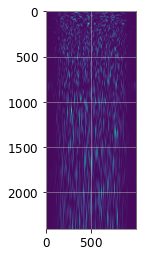

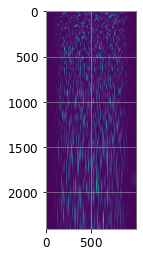

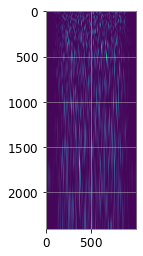

In [191]:
epoch = np.empty(3)
ifo = []
"""def prep_data(ifo, epoch):
  #data_Q_Transglitch = TimeSeries.fetch_open_data(ifo, epoch-2, epoch+2)
  return TimeSeries.fetch_open_data(ifo, epoch-5, epoch-1)"""

for i in range(0, 3, 1):
  epoch[i] = int(glitch_data['GPStime'][i])
  ifo.append(glitch_data['ifo'][i])
  #interval[i] = round((glitch_data['GPStime'][i] %1), 3) 
  #print(epoch[i])
  #print(ifo[i])
  #print(i)
  #print(prep_data(ifo[i], epoch[i]))
  #print(TimeSeries.fetch_open_data(ifo[i], epoch[i]-5, epoch[i]-1))
print(ifo, epoch)
images = []
for a in range(0, 3, 1):
  I = TimeSeries.fetch_open_data(ifo[a], epoch[a]-5, epoch[a]-1).q_transform()
  images.append(I)
for I in images:
  plt.imshow(I)
  plt.show()
  time.sleep(0.01)
  #ax = plot.gca()
  #plot.show()

In [189]:
images

[<Spectrogram([[8.3281184e-03, 8.3281184e-03, 8.3160875e-03, ...,
                1.4318150e-03, 1.4318150e-03, 1.4318150e-03],
               [8.4208762e-03, 8.4208762e-03, 8.3737010e-03, ...,
                1.1390134e-03, 1.1390134e-03, 1.1390134e-03],
               [8.4182564e-03, 8.4182564e-03, 8.3434004e-03, ...,
                2.2695025e-05, 2.2695025e-05, 2.2695025e-05],
               ...,
               [1.1328106e-02, 1.1328106e-02, 1.1268545e-02, ...,
                3.4572764e-03, 3.4572764e-03, 3.4572764e-03],
               [1.2721842e-02, 1.2721842e-02, 1.2579493e-02, ...,
                1.7849490e-03, 1.7849490e-03, 1.7849490e-03],
               [1.4350488e-02, 1.4350488e-02, 1.4106200e-02, ...,
                1.1546374e-03, 1.1546374e-03, 1.1546374e-03]]
              unit=Unit(dimensionless),
              name=None,
              epoch=<Time object: scale='utc' format='gps' value=1127198627.0000002>,
              channel=None,
              x0=<Quantity 1.1271

In [0]:
for i in range(0, 2, 1):
  epoch = int(glitch_data['GPStime'][i])
  ifo = glitch_data['ifo'][i]
  interval = round((glitch_data['GPStime'][i] %1), 3)
  print(epoch, interval)

1127198632 0.888
1132213256 0.375


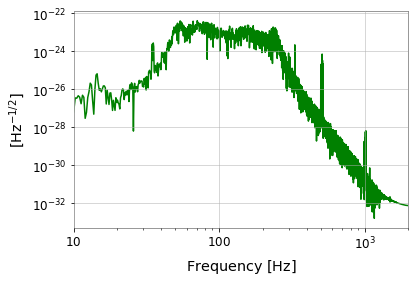

In [0]:
data_asd = datafilt.asd(4, 2)
plot = data_asd.plot(color='g')
ax = plot.gca()
ax.set_xlim(10, 2000)
#ax.set_ylim(5e-24, 1e-21)
plot.show()

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, data.sample_rate)

notches = [filter_design.notch(line, data.sample_rate) for
           line in (60, 120, 180)]

In [0]:
zpk = filter_design.concatenate_zpks(bp, *notches)
datafilt = data.filter(zpk, filtfilt=True)

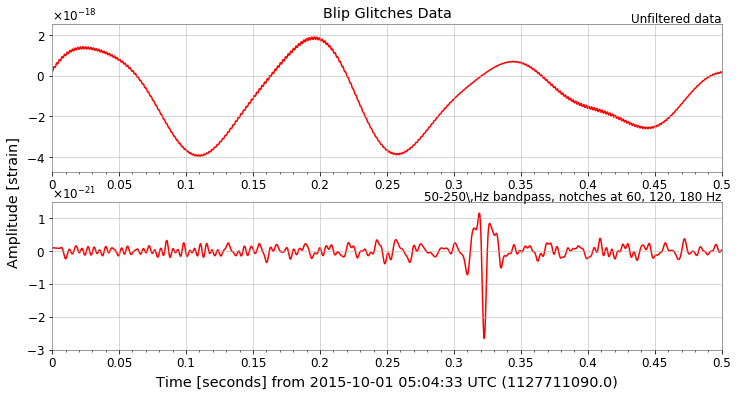

In [0]:
from gwpy.plot import Plot
plot = Plot(data, datafilt, figsize=[12, 6], separate=True, sharex=True, color='r')
ax1, ax2 = plot.axes
ax1.set_title('Blip Glitches Data')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.set_xlim(1127711090, 1127711090.5)
ax2.set_ylim(-3e-21, 1.5e-21)
ax2.text(1.0, 1.01, '50-250\,Hz bandpass, notches at 60, 120, 180 Hz', transform=ax2.transAxes, ha='right')
plot.show()

In [0]:
import pandas as pd
raw_data = pd.read_csv("/content/gdrive/My Drive/gspy_blip_o1.csv")

In [0]:
glitch_data = raw_data[['GPStime','ifo', 'peakFreq', 'snr', 'amplitude', 'centralFreq','duration']]